In this problem, we seek to solve 1D transverse field Ising model and find the ground state of it. Then try to diaganolize the Hamiltonian of the system and find out that in which condition, we have a phase transition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

The Hamiltonian of the system is 
$$\mathcal H = -J \sum_{i = 1}^{N} \sigma_z^i \sigma_z^{i+1} - h \sum_{i = 1}^{N} \sigma_x^i$$
where we choose $J = 1$ and $h \in [0, 1]$. Therefore we have 10 data sets and can find the critical point, called $h_c$ 

In [2]:
N = 12
J = 1
h = np.arange(0.1, 5, 0.1)

Pauli matrices:
$$\sigma_z = \frac 1 2\begin{bmatrix}
       1 & 0 \\
       0 & -1
     \end{bmatrix}, \quad \sigma_x = \frac 1 2 \begin{bmatrix}
       0 & 1 \\
       1 & 0
     \end{bmatrix}$$

In [3]:
sigmaz = 0.5 * np.matrix('1 0 ; 0 -1')
sigmaz = sp.csr_matrix(sigmaz)
sigmax = 0.5 * np.matrix('0 1; 1 0')
sigmax = sp.csr_matrix(sigmax)

In our Hamiltonian, we have tensor products of puali matrices for each spin, so
$$\sigma_z^i = \underbrace{I \otimes I \otimes \cdots \otimes I}_\text{i-1} \otimes \sigma_z \otimes \underbrace{I \otimes I \otimes \cdots \otimes I}_\text{N-i}$$

$$\sigma_x^i = \underbrace{I \otimes I \otimes \cdots \otimes I}_\text{i-1} \otimes \sigma_x \otimes \underbrace{I \otimes I \otimes \cdots \otimes I}_\text{N-i}$$

In [4]:
sigma_z = dict()
sigma_x = dict()
for j in range(1, N+1):
    sigma_z[j] = sigmaz
    sigma_x[j] = sigmax
    for k in range(1, j):
        sigma_z[j] = sp.kron(sp.identity(2), sigma_z[j])
        sigma_x[j] = sp.kron(sp.identity(2), sigma_x[j])
    for k in range(1, N-j+1):
        sigma_z[j] = sp.kron(sigma_z[j], sp.identity(2))
        sigma_x[j] = sp.kron(sigma_x[j], sp.identity(2))

Again, we write our Hamiltonian:
$$\mathcal H_h = -J \sum_{i = 1}^{N} \sigma_z^i \sigma_z^{i+1} - h \sum_{i = 1}^{N} \sigma_x^i$$

In [5]:
H = dict()
for l in h:
    H[l] = sp.csr_matrix((2**N, 2**N))
    for i in range(1, N):
        H[l] = H[l] - sigma_z[i].multiply(sigma_z[i+1]) - sigma_x[i]
    H[l] = H[l] - J*sigma_z[N].multiply(sigma_z[1]) - l*sigma_x[N]

Now, we want to diagonalize the Hamiltonian:
$$H_h \psi_n = E_n \psi_n$$
where $\psi_n$ is the $n$th eigenvector and $E_n$ is the $n$th eigenvalue.

In [6]:
from scipy.sparse.linalg import eigs
E_n = dict()
psi_n = dict()
for l in h:
    E_n[l], psi_n[l] = eigs(H[l])

We seek to find the ground state. So we have to find the minimum of $E_n$ and call it $E_{min}$ and the ground state $\psi_{min}$.

Then our purpose is to calculate 
$$G(\sigma_z^i, \sigma_z^{i+1}) = \mathbb E(\sigma_z^i \sigma_z^{i+1}) - \mathbb E(\sigma_z^i) \mathbb E(\sigma_z^{i+1})  $$
where 
$\mathbb E (C) = \psi_{min}^* C\psi_{min}$

/Users/parsarangriz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


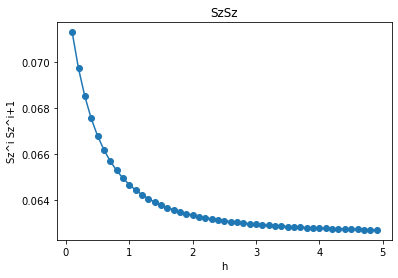

In [8]:
G = dict()
for l in h:
    Sigma_zz= np.dot(np.conjugate(psi_n[l][:, np.argmin(E_n[l])]), sigma_z[1].multiply(sigma_z[1+1]).dot(psi_n[l][:, np.argmin(E_n[l])]))
    Sigma_z = np.dot(np.conjugate(psi_n[l][:, np.argmin(E_n[l])]), sigma_z[1].dot(psi_n[l][:, np.argmin(E_n[l])]))
    Sigma_z2 = np.dot(np.conjugate(psi_n[l][:, np.argmin(E_n[l])]), sigma_z[1+1].dot(psi_n[l][:, np.argmin(E_n[l])]))
    G[l] = Sigma_zz - Sigma_z*Sigma_z2
plt.plot(h, G.values(), 'o-')
plt.ylabel('Sz^i Sz^i+1')
plt.xlabel('h')
plt.title("SzSz")
plt.show()

In this moment, we try to evaluate the mean of $\sigma_x$. In the other word, we try to find
$$S = \mathbb E(\sigma_x^i)$$

/Users/parsarangriz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


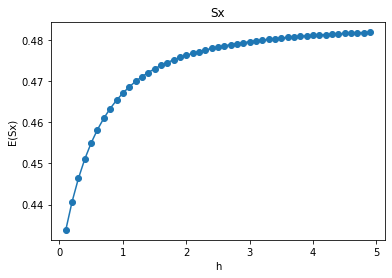

In [9]:
S = dict()
for l in h:
    S[l] = np.dot(np.conjugate(psi_n[l][:, np.argmin(E_n[l])]), sigma_x[1].dot(psi_n[l][:, np.argmin(E_n[l])]))
plt.plot(h, S.values(), 'o-')
plt.xlabel("h")
plt.ylabel("E(Sx)")
plt.title("Sx")
plt.show()